In [ ]:
import numpy as np
import matplotlib.pyplot as plt


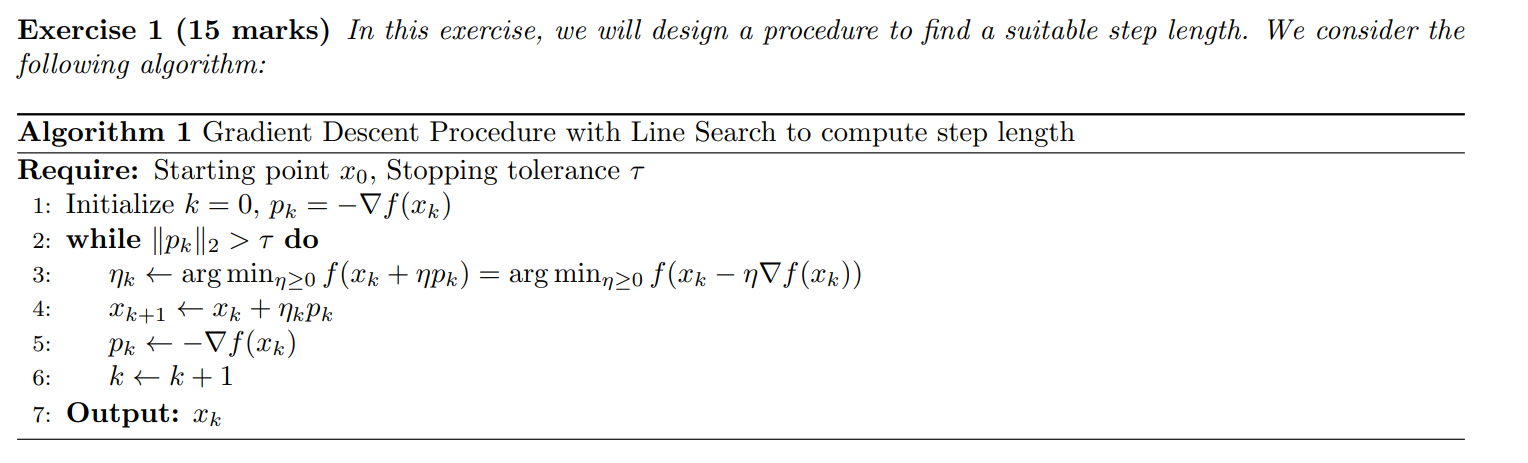


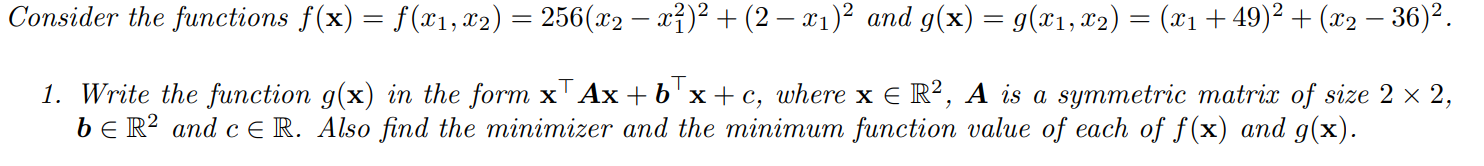

**ANS_1** g(x) in the form
$X^\top AX + b^\top X + c$
$$
X = \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$
$ $
$$
A = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$
$
$

$$
b=\begin{pmatrix}
98\\
-72
\end{pmatrix}
$$
$
$
$$
c=3697
$$
Minimizers of f(x) is  $x_1 , x_2$ = (2,4) and minimum value is f(2,4)=0
\
Minimizers of g(x) is  $x_1 , x_2$ = (-49,36) and minimum value is g(-49,36)=0

In [ ]:
def functfx(x):
  fx=256*(x[1]-x[0]**2)**2+(2-x[0])**2
  return fx
def functgx(x):
  gx=(x[0]+49)**2+(x[1]-36)**2
  return gx
def partialfx(x):
  dfx1=-1024*x[0]*(x[1]-x[0]**2)-2*(2-x[0])
  dfx2=512*(x[1]-x[0]**2)
  return [dfx1,dfx2]


In [ ]:
def funct_gx_matrix(x):
  x=np.array(x)
  x_trans=x.transpose()
  a=np.array([[1,0],[0,1]])
  b=np.array([98,-72])
  c=3697
  gx=x@a@x + b@x + c
  return gx
funct_gx_matrix([0,0])

3697

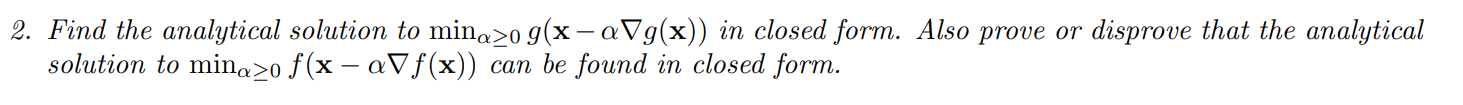

Analytical solution to
$
arg\,min_{\alpha \geq 0} \quad g(x-\alpha \nabla g(x))
$

Note that $\nabla g(x)=\left\langle 2\left(x_1+49\right), 2\left(x_2-36\right)\right\rangle$
$
\Rightarrow x-\alpha \nabla g(x)=\left\langle x_1-2 \alpha\left(x_1+49\right), x_2-2 \alpha\left(x_2-36\right)\right\rangle
$
$\Rightarrow g(x-\alpha \nabla g(x))=\left(x_1-2 \alpha\left(x_1+49\right)+49\right)^2 +\left(x_2-2 \alpha\left(x_2-36\right)-36\right)^2 \\
= \quad\left(x_1+49\right)^2(1-2 \alpha)^2+\left(x_2-36\right)^2(1-2 \alpha)^2
$

Assuming $\quad \gamma(\alpha)=g(x-\alpha \nabla g(x))$

Minimizing $\gamma(\alpha)$ will result in $\operatorname{argmin}_{\alpha \geqslant 0} g(x-\alpha \nabla g(x))$

We notice that $\gamma(\alpha)$ again is an always positive function hence,
Minimum can be achieved if $\alpha = 0.5$, for which $\gamma(\alpha)=0$ which is lowest possible.
Therefore, $\alpha = 0.5$ is the exact line search coefficient which is in closed form.

$$
\min _{\alpha \geqslant 0} f(x-\alpha \nabla f(x)) .
$$

Note that,
$$
\nabla f=\left\langle 1024 x_1\left(x_1^2-x_2\right)+2 x_1-4,-512 x_1^2+512 x_2\right\rangle
$$

Therefore
$$
\begin{aligned}
& \underset{\alpha>0}{\operatorname{argmin}} f(x-\alpha \nabla f) \\
& =f\left(x_1-\alpha\left(1024 x_1\left(x_1^2-x_2\right)+2 x_1-4\right),\quad x_2-\alpha\left(512 x_2-512 x_1^2\right)\right)
\end{aligned}
$$

This is a quartic function in $\alpha$ and will not have a unique sol ${ }^n$ for $\operatorname{argmin}_{\alpha \geqslant 0}$.
Closed form solution might exist but definitely not unique and easy.

In [ ]:
!pip install numdifftools
import numdifftools as nd
import sympy as sp

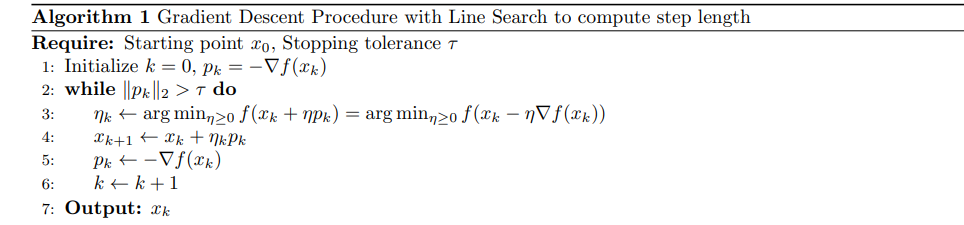

In [ ]:
def gradient_descent_step_line(x0):
    lis=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]#,1e-16]#,1e-17,1e-18,1e-19]#,1e-20]
    new_optimal=[]
    coordinates=[]
    iteration=[]
    all_xy=[]
    for t in lis:
      x=x0
      d=nd.Gradient(functgx,method='complex')(x)
      fx_norm=np.linalg.norm(d)
      k=0
      x_y=[]

      while fx_norm > t:

        x=x-0.5*d
        d=nd.Gradient(functgx)(x)#gx is analytic and its step lenth (alpha=1/2 always) therefore we can get solution in one step always.
        k=k+1
        fx_norm=np.linalg.norm(d)

        x_y.append(x)
        #print(f'the norm at tau {t} is: {fx_norm}' )
      optimal=[functgx(x)]
      coord=x
      all_xy.append(x_y)
      coordinates.append(coord)
      new_optimal.append(optimal)
      iteration.append(k)
    #print(iteration)
    return new_optimal,coordinates,iteration,all_xy
gradient_descent_step_line([36,-49])

([[0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0]],
 [array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.]),
  array([-49.,  36.])],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [[array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])],
  [array([-49.,  36.])]])

In [ ]:
#Algo-2 Previous lab:
def grad_descent(x,n):
  lis=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08]#,1e-09,1e-10,1e-11,1e-12]
  new_optimal=[]

  coordinates=[]

  k=0
  iteration=[]
  all_x_y=[]
  n=0.001
  for t in lis:
    d=nd.Gradient(functgx,method='complex')(x)
    fx_norm=np.linalg.norm(d)
    x_y=[]
    while fx_norm>t:
      x=x-n*d
      d=nd.Gradient(functgx,method='complex')(x)
      fx_norm=np.linalg.norm(d)
      optimal=functgx(x)
      coord=x
      x_y.append(coord)
      k=k+1
    coordinates.append(coord)
    new_optimal.append(optimal)
    all_x_y.append(x_y)
    iteration.append(k)

  return new_optimal ,coordinates,iteration,all_x_y
grad_descent([36,-49],0.001)

([0.002495847123483783,
  2.4972552866985446e-05,
  2.4986642435628456e-07,
  2.490083692006672e-09,
  2.491488574043658e-11,
  2.492894552673773e-13,
  2.4943010583805026e-15,
  2.495729546720209e-17],
 [array([-48.96467404,  35.96467404]),
  array([-48.99646641,  35.99646641]),
  array([-48.99964654,  35.99964654]),
  array([-48.99996471,  35.99996471]),
  array([-48.99999647,  35.99999647]),
  array([-48.99999965,  35.99999965]),
  array([-48.99999996,  35.99999996]),
  array([-49.,  36.])],
 [3889, 5039, 6189, 7340, 8490, 9640, 10790, 11940],
 [[array([ 35.83, -48.83]),
   array([ 35.66034, -48.66034]),
   array([ 35.49101932, -48.49101932]),
   array([ 35.32203728, -48.32203728]),
   array([ 35.15339321, -48.15339321]),
   array([ 34.98508642, -47.98508642]),
   array([ 34.81711625, -47.81711625]),
   array([ 34.64948202, -47.64948202]),
   array([ 34.48218305, -47.48218305]),
   array([ 34.31521868, -47.31521868]),
   array([ 34.14858825, -47.14858825]),
   array([ 33.98229107, -

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<Axes: >

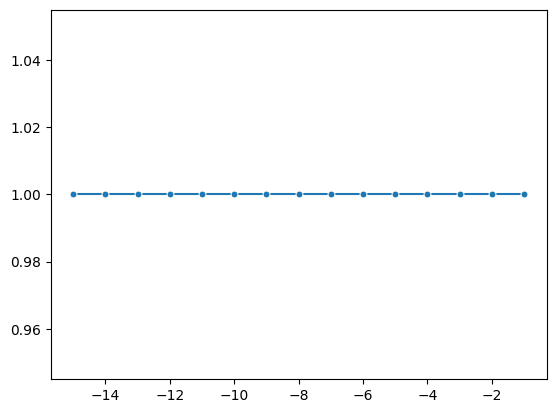

In [ ]:
import seaborn as sns
lis=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
sns.lineplot(x= np.log10(lis),y=  gradient_descent_step_line([36,-49])[2], marker= 'o', markersize = 5)

<Axes: >

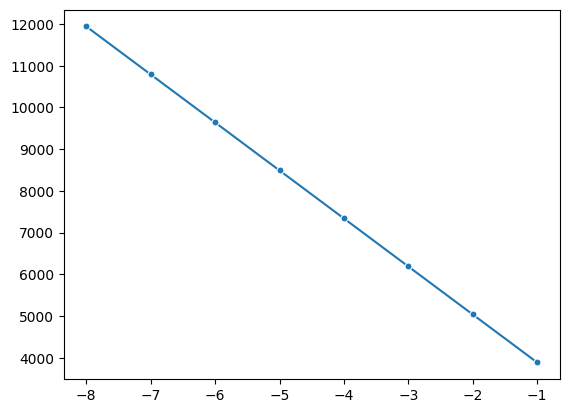

In [ ]:
import seaborn as sns
lis=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08]#,1e-09,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
sns.lineplot(x= np.log10(lis),y= grad_descent([36,-49],0.001)[2], marker= 'o', markersize = 5)

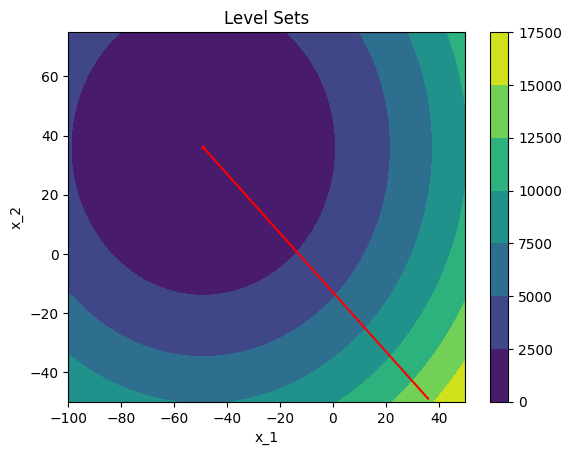

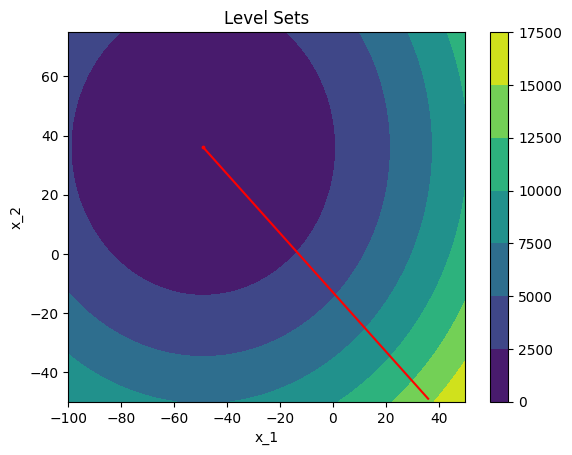

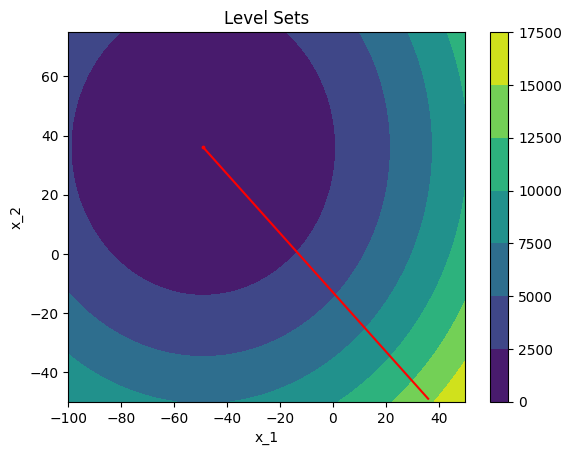

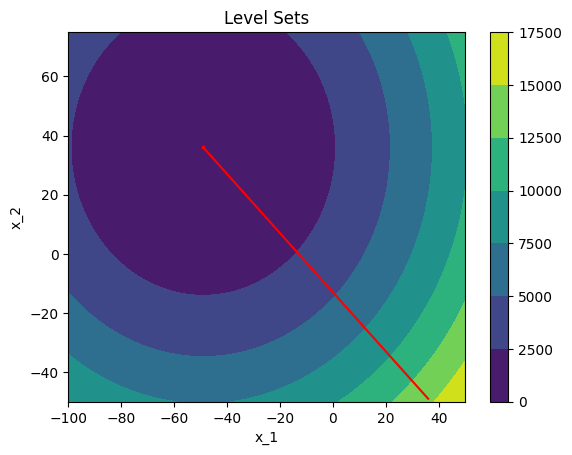

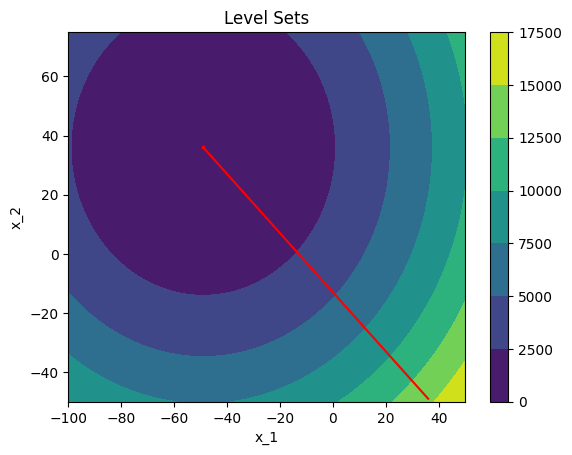

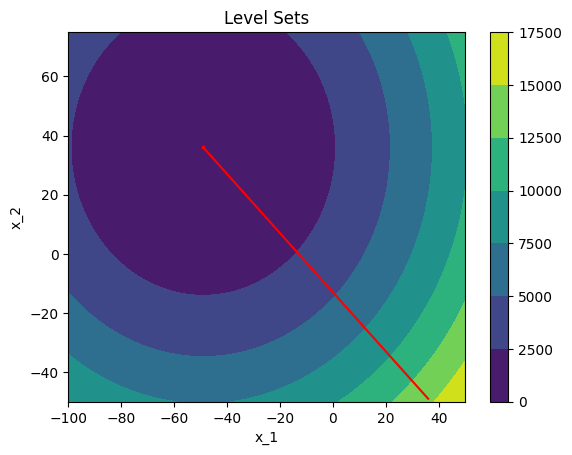

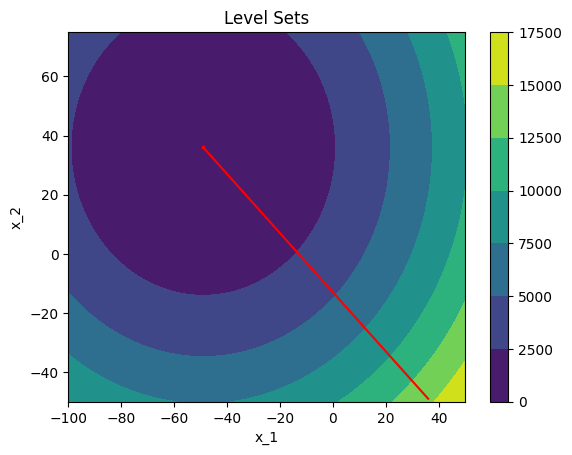

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
# Define the function




# Create a grid of x and y values
x_values = np.linspace(-100, 50, 1000)
y_values = np.linspace(-50, 75, 1000)
x, y = np.meshgrid(x_values, y_values)
for i in range(1,8):
  p=plt.contourf(x, y, functgx([x, y]))
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  cbar=plt.colorbar(p)
  plt.title('Level Sets')


  x0 = [36,-49]
  xc = []
  yc = []
  xc.append(x0[0])
  yc.append(x0[1])

  x_y=grad_descent([36,-49],0.001)[3][i]

  #Plot the function

  xc.append(x_y[i][0])
  yc.append(x_y[i][1])

  plt.plot(yc,xc ,color="red", markersize = 2)
  plt.scatter(-49,36,c='r',s=3)
  # Display the plot
  plt.show()
  #optimal value for this function is at

[-49.  36.]


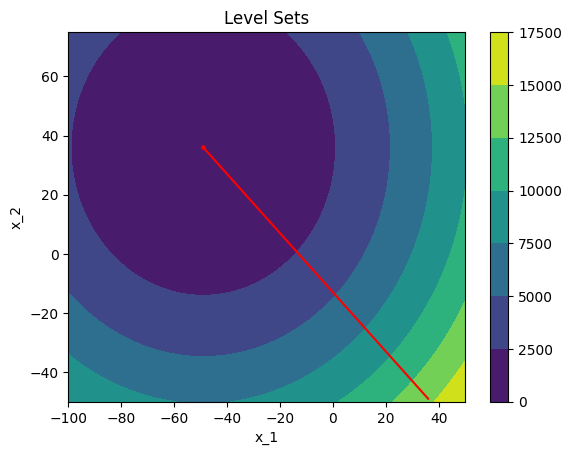

[-49.  36.]


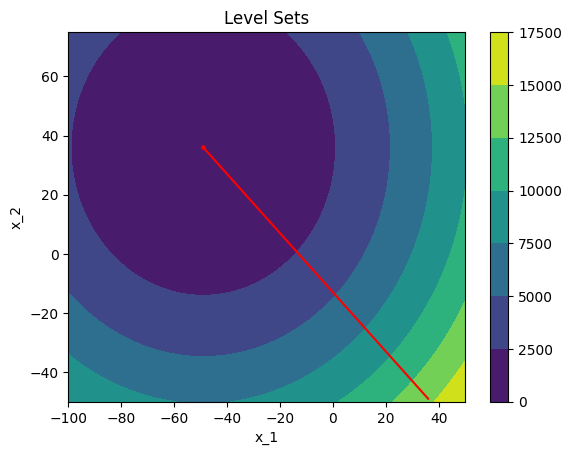

[-49.  36.]


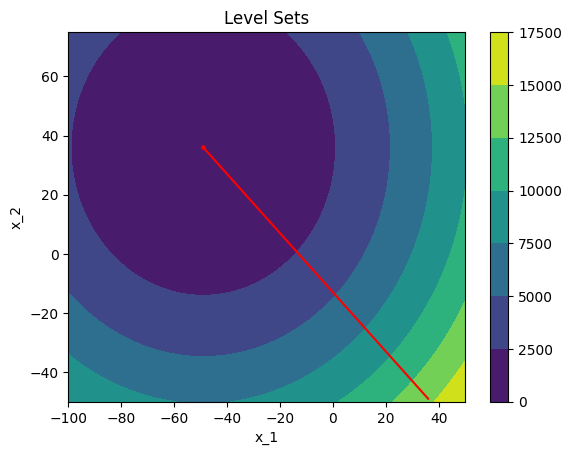

[-49.  36.]


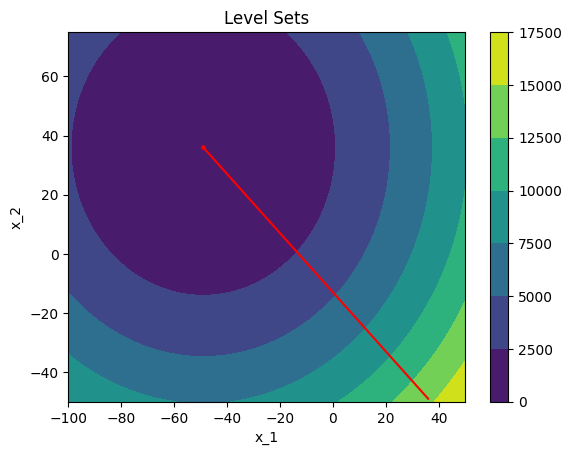

[-49.  36.]


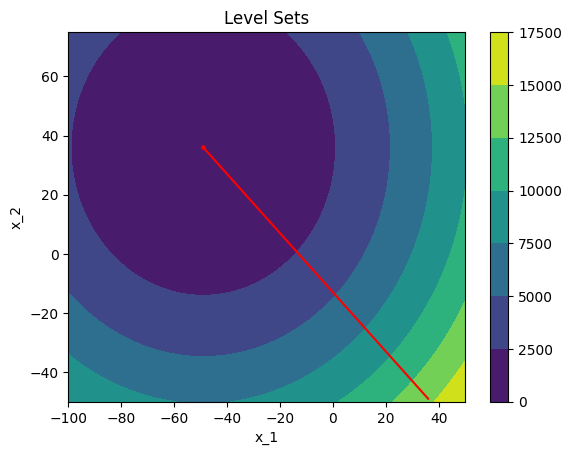

[-49.  36.]


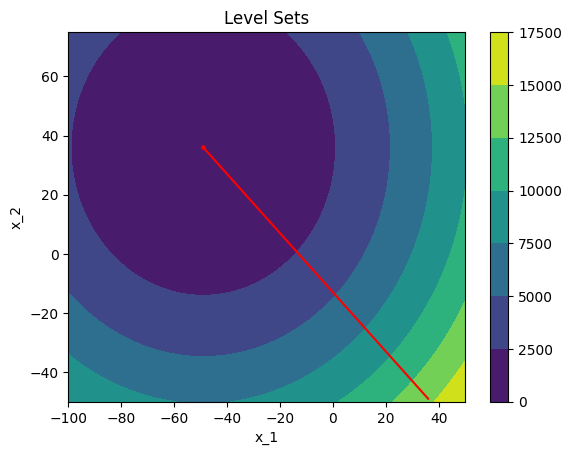

[-49.  36.]


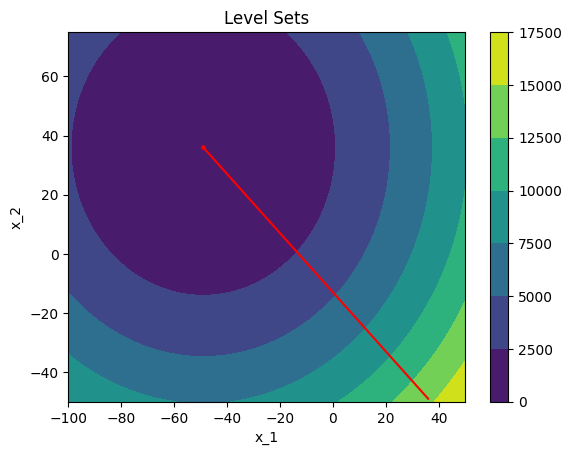

[-49.  36.]


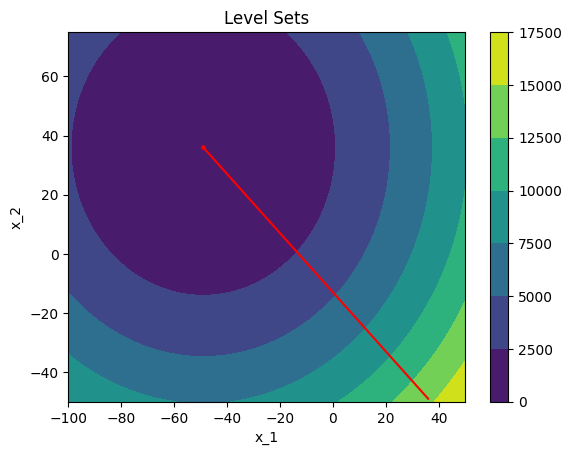

[-49.  36.]


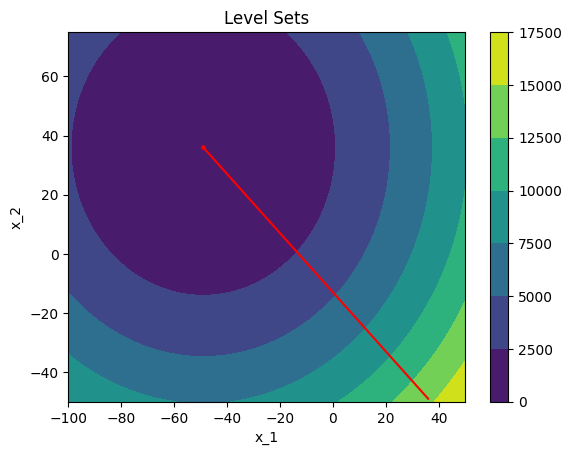

In [ ]:
# Create a grid of x and y values
x_values = np.linspace(-100, 50, 1000)
y_values = np.linspace(-50, 75, 1000)
x, y = np.meshgrid(x_values, y_values)
for i in range(1,10):
  p=plt.contourf(x, y, functgx([x, y]))
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  cbar=plt.colorbar(p)
  plt.title('Level Sets')


  x0 = [36,-49]
  xc = []
  yc = []
  xc.append(x0[0])
  yc.append(x0[1])

  x_y=gradient_descent_step_line([36,-49])[3][i][0]
  print(x_y)
  #Plot the function

  xc.append(x_y[0])
  yc.append(x_y[1])

  plt.plot(xc,yc ,color="red", markersize = 2)
  plt.scatter(-49,36,c='r',s=5)
  # Display the plot
  plt.show()
  #optimal value for this function is at

In [ ]:
#Seeing the above plots, we first observe that iteration taking keep on increasing as we decrese t, although we take very small step in Algorithm 2 which is of 0.001, we keep on moving in the direction of minimizer. Second thing to observe is the Algorithm 2 of Lab 1 is not working for p values of (12,13,14,15), while Algorithm 1 of this lab works for all p values as only one step is needed to optimize to directly move towards the minimizer.

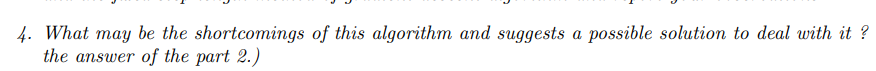

The shortcomings can be seen in above cases when we are plotting the curves the major thing is time for both the algorithims therefore the algorithm which is fast I would consider that one be the best one


Exact line search in gradient descent involves finding the step size or learning rate that minimizes the objective function along the search direction. While it may seem ideal, there are some shortcomings associated with exact line search:

1. Exact line search requires evaluating the objective function at multiple points along the search direction to find the optimal step size. This can be computationally expensive, especially in high-dimensional optimization problems where each function evaluation involves a substantial amount of computation. In many cases, finding the exact minimum step size may not be necessary for convergence. A fixed or adaptive learning rate might be sufficient for achieving convergence, especially when dealing with convex and well-behaved objective functions. Computational Overhead: In some situations, the benefit gained from the precision of an exact line search might not justify the additional computational overhead. Approximate line search methods, such as backtracking line search, are often used as they strike a balance between accuracy and computational efficiency.

2. Limited Applicability to Non-Smooth Functions: Exact line search methods are designed for smooth, differentiable functions. They may not be suitable for non-smooth or discontinuous functions where the concept of a gradient may not be well-defined.

In practice, due to these shortcomings, practitioners often use approximate line search methods, such as backtracking line search or fixed step sizes, which provide a good balance between computational efficiency and convergence speed

In [ ]:
# clearly for quadratic we use newton it gives one step whereas back tracking with different alpha finding by direct step we get optimal solution faster than other (alg0-2).